In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
times = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-04-19/times.csv')
times.head()

,rowid,clue,answer,definition,clue_number,puzzle_date,puzzle_name,source_url,source
0,1,"Acquisitive chap, as we see it (8)",COVETOUS,Acquisitive,1a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
1,2,Back yard fencing weak and sagging (6),DROOPY,sagging,5a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
2,3,"Stripping off uniform, love holding colonel's ...",UNCLOTHING,Stripping,8a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
3,4,Without a mark where they should be gained (4),EXAM,where they should be gained,9a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times
4,5,"Put a stop to Rugby's foul school leader (5,2,...",KNOCK ON THE HEAD,Put a stop to,10a,2019-08-08,Times 27424,https://times-xwd-times.livejournal.com/218581...,times_xwd_times


In [ ]:
big_dave = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-04-19/big_dave.csv')
big_dave.head()

,rowid,clue,answer,definition,clue_number,puzzle_date,puzzle_name,source_url,source
0,293219,Animal doctor tense after sheep rejected (6),MARMOT,Animal,1a,2021-05-12,Daily Telegraph 29673,http://bigdave44.com/2021/05/12/dt-29673/,bigdave44
1,293220,Minister sees train regularly taken by nuisanc...,PRIEST,Minister,5a,2021-05-12,Daily Telegraph 29673,http://bigdave44.com/2021/05/12/dt-29673/,bigdave44
2,293221,"Level, yet still at the start (5)",EVENS,Level,10a,2021-05-12,Daily Telegraph 29673,http://bigdave44.com/2021/05/12/dt-29673/,bigdave44
3,293222,Robust binding (9),STRAPPING,Robust/binding,11a,2021-05-12,Daily Telegraph 29673,http://bigdave44.com/2021/05/12/dt-29673/,bigdave44
4,293223,"Perform better, needing expenditure to cover p...",OUTPLAY,Perform better,12a,2021-05-12,Daily Telegraph 29673,http://bigdave44.com/2021/05/12/dt-29673/,bigdave44


In [ ]:
cwords =  pd.concat([times, big_dave])
cwords.shape

(315455, 9)

In [ ]:
times.shape

(100661, 9)

In [ ]:
big_dave.shape

(214794, 9)

In [ ]:
cwords['puzzle_date']= pd.to_datetime(cwords['puzzle_date'])
cwords['year'] = pd.DatetimeIndex(cwords['puzzle_date']).year

cwords = cwords.sort_values(by=['puzzle_date'])

cwords.head()

,rowid,clue,answer,definition,clue_number,puzzle_date,puzzle_name,source_url,source,year
171898,465117,Way Dad’s camera wobbles – yet prizes for pict...,ACADEMY AWARDS,NaN,9d,2009-02-27,Daily Telegraph Cryptic No 25863,http://bigdave44.com/2009/02/27/dt-cryptic-no-...,bigdave44,2009.0
171891,465110,Party maiden favouring brief time for tenderne...,DISCOMFORT,NaN,1d,2009-02-27,Daily Telegraph Cryptic No 25863,http://bigdave44.com/2009/02/27/dt-cryptic-no-...,bigdave44,2009.0
171887,465106,Warship about to explode (1-4),U,NaN,21a,2009-02-27,Daily Telegraph Cryptic No 25863,http://bigdave44.com/2009/02/27/dt-cryptic-no-...,bigdave44,2009.0
171888,465107,Box? He must do this to get here! (9),CONTAINER,NaN,23a,2009-02-27,Daily Telegraph Cryptic No 25863,http://bigdave44.com/2009/02/27/dt-cryptic-no-...,bigdave44,2009.0
171889,465108,Shape of projecting piece different on the out...,ELLIPSE,NaN,24a,2009-02-27,Daily Telegraph Cryptic No 25863,http://bigdave44.com/2009/02/27/dt-cryptic-no-...,bigdave44,2009.0


In [ ]:
daily_rows = cwords.groupby(['puzzle_date' , 'source']).agg('count')[['rowid'] ].reset_index()

daily_rows['year'] = pd.DatetimeIndex(daily_rows['puzzle_date']).year
daily_rows['month'] = pd.DatetimeIndex(daily_rows['puzzle_date']).month
daily_rows['wday'] = pd.DatetimeIndex(daily_rows['puzzle_date']).day_name()

daily_rows['ma7'] = daily_rows['rowid'].rolling(2, min_periods=1).mean()
daily_rows['ma30'] = daily_rows['rowid'].rolling(30, min_periods=1).mean()
daily_rows['ma60'] = daily_rows['rowid'].rolling(60, min_periods=1).mean()
daily_rows['ma90'] = daily_rows['rowid'].rolling(90, min_periods=1).mean()



daily_rows.head()

,puzzle_date,source,rowid,year,month,wday,ma7,ma30,ma60,ma90
0,2009-02-27,bigdave44,27,2009,2,Friday,27.0,27.000000,27.000000,27.000000
1,2009-03-02,bigdave44,30,2009,3,Monday,28.5,28.500000,28.500000,28.500000
2,2009-03-03,bigdave44,58,2009,3,Tuesday,44.0,38.333333,38.333333,38.333333
3,2009-03-04,bigdave44,57,2009,3,Wednesday,57.5,43.000000,43.000000,43.000000
4,2009-03-05,bigdave44,56,2009,3,Thursday,56.5,45.600000,45.600000,45.600000


In [ ]:
daily_rows.shape

(5949, 7)

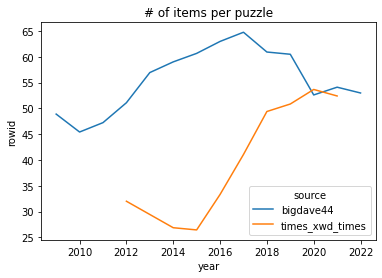

In [ ]:
year_words = daily_rows.groupby([ 'source' , 'year']).mean().reset_index()

sns.lineplot( data = year_words , x = 'year' , y = 'rowid' , hue='source')

plt.title("# of items per puzzle")

plt.show()

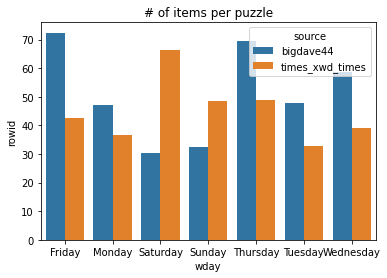

In [ ]:
wday_words = daily_rows.groupby([ 'source' , 'wday']).mean().reset_index()

sns.barplot( data = wday_words , x = 'wday' , y = 'rowid' , hue='source')

plt.title("# of items per puzzle")

plt.show()

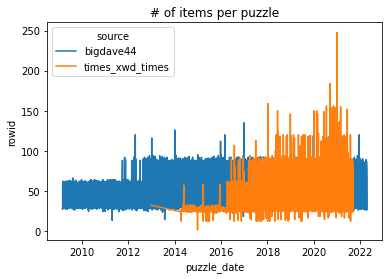

In [ ]:
sns.lineplot( data = daily_rows , x = 'puzzle_date' , y = 'rowid' , hue='source')

plt.title("# of items per puzzle")

plt.show()

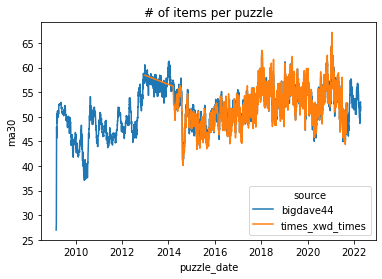

In [ ]:
sns.lineplot( data = daily_rows , x = 'puzzle_date' , y = 'ma30' , hue='source')

plt.title("# of items per puzzle")
plt.show()

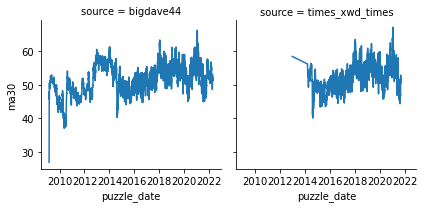

In [ ]:
g = sns.FacetGrid(daily_rows, col="source")
g.map(sns.lineplot, "puzzle_date", "ma30" )

In [ ]:
words = cwords.groupby('answer').count()[['rowid']].reset_index()
words = words.sort_values(by=['rowid'] ,  ascending=  False)
words.head()

,answer,rowid
24132,EXTRA,117
47167,ONE,115
45450,NON,114
76142,WELL,110
33162,ILL,109


In [ ]:
words.shape

(77968, 1)

In [ ]:
words_yr = cwords.groupby(['year' , 'answer']).count()[['rowid']].reset_index()
words_yr = words_yr.sort_values(by=['rowid'] ,  ascending=  False)
words_yr.head()

,year,answer,rowid
117993,2017.0,ONE,22
133674,2018.0,EXTRA,19
126206,2018.0,A,17
182271,2020.0,ILL,17
184163,2020.0,LOTUS,17


In [ ]:
words_yr['rank'] = words_yr.groupby('year')['rowid'].rank(ascending=False , method='dense')#.reset_index()
words_yr.head()

,year,answer,rowid,rank
117993,2017.0,ONE,22,1.0
133674,2018.0,EXTRA,19,1.0
126206,2018.0,A,17,2.0
182271,2020.0,ILL,17,1.0
184163,2020.0,LOTUS,17,1.0


In [ ]:
words_yr[words_yr['rank'] < 11]#.pivot(columns='year' , values='answer')

,year,answer,rowid,rank
117993,2017.0,ONE,22,1.0
133674,2018.0,EXTRA,19,1.0
126206,2018.0,A,17,2.0
182271,2020.0,ILL,17,1.0
184163,2020.0,LOTUS,17,1.0
...,...,...,...,...
30578,2011.0,WELL CONTENT,1,9.0
30577,2011.0,WELL,1,9.0
30574,2011.0,WEIR,1,9.0
30576,2011.0,WELFARE STATE,1,9.0
